In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data_path = 'electronika_03_04.xlsx'
data_path = 'electronika_dataset.xlsx'
data = pd.read_excel(Path.cwd()/data_path)

data.head()

,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,...,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID
0,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,Услуги/Доставка/,13.0,35554.0
1,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,3520.0,0.0,3520.0,NaN,NaN,NaN,Услуги/Страхование техники/Гарант +/,13.0,16686.0
2,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,35999.0,0.0,35999.0,Samsung,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/Smart теле...",13.0,95567.0
3,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,11:22:51.000,201603,2016-03-30 11:24:32.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,490.0,0.0,490.0,NaN,NaN,NaN,Услуги/Доставка/,13.0,29329.0
4,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,11:22:51.000,201603,2016-03-30 11:24:32.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,2.0,3990.0,0.0,7980.0,NaN,NaN,NaN,Установка и настройка техники/Установка и наст...,13.0,2748.0


In [3]:
df = data.copy(deep = True)

In [4]:
data=df.copy(deep = True)

# Explaratory Data Analysis

In [5]:
# data shape
data.shape

(357036, 37)

In [6]:
# what feature we have
data.columns

Index(['Order_ID', 'Email_new', 'Phone_new', 'Source', 'OrderDate', 'время',
       'месяц', 'ChangeDate', 'DeliveryDate', 'PaymentDate', 'Status',
       'Status_ID', 'OneClick', 'CancelReason', 'Actions', 'DeliveryType',
       'PaymentType', 'Region', 'Area', 'Store_ID', 'FullSum', 'Discount',
       'IM_Rozn_Sum', 'Row_ID', 'Articul', 'Nom_Name', 'NomGroup', 'Quant',
       'RowPrice', 'RowDiscount', 'RowSum', 'Brand', 'TN', 'TK', 'NomFullPath',
       'Week', 'Nom_ID'],
      dtype='object')

In [7]:
def df_info(df: pd.DataFrame):
    t = []
    for col in df.columns:
        k_unique = df[col].nunique()
        k_nan = df[col].isna().sum()
        k_zeros = (df[col] == 0).sum()
        d_type = df[col].dtype
        
        t.append([col, k_unique, k_nan, k_zeros, d_type])

    col_info = pd.DataFrame(t, columns=['columns', 'unique', 'NaN', 'zeros', 'd_type'])
    return col_info

In [8]:
# See how 'raw' the data is
info = df_info(data)
info

,columns,unique,NaN,zeros,d_type
0,Order_ID,166794,0,0,object
1,Email_new,99284,0,61516,object
2,Phone_new,123135,0,7575,object
3,Source,4,0,0,object
4,OrderDate,61,0,0,datetime64[ns]
5,время,58549,0,0,object
6,месяц,2,0,0,int64
7,ChangeDate,155189,0,0,object
8,DeliveryDate,100,0,0,object
9,PaymentDate,105118,0,0,object


In [9]:
info['nan_share'] = info['NaN'] / data.shape[0]
info['zero_share'] = info['zeros'] / data.shape[0]
info

,columns,unique,NaN,zeros,d_type,nan_share,zero_share
0,Order_ID,166794,0,0,object,0.000000,0.000000
1,Email_new,99284,0,61516,object,0.000000,0.172296
2,Phone_new,123135,0,7575,object,0.000000,0.021216
3,Source,4,0,0,object,0.000000,0.000000
4,OrderDate,61,0,0,datetime64[ns],0.000000,0.000000
5,время,58549,0,0,object,0.000000,0.000000
6,месяц,2,0,0,int64,0.000000,0.000000
7,ChangeDate,155189,0,0,object,0.000000,0.000000
8,DeliveryDate,100,0,0,object,0.000000,0.000000
9,PaymentDate,105118,0,0,object,0.000000,0.000000


In [10]:
descr = pd.DataFrame()
x = []
for col in data.select_dtypes(include=np.number).columns:
    x.append(np.median(data[col].dropna()))

pd.DataFrame(zip(data.select_dtypes(include=np.number).columns, x), columns=['Column', 'Median'])

,Column,Median
0,месяц,201603.0
1,Status_ID,14.0
2,OneClick,0.0
3,Store_ID,3458.0
4,FullSum,6090.0
5,Discount,0.0
6,IM_Rozn_Sum,6099.0
7,Row_ID,2.0
8,Articul,1157790.0
9,Quant,1.0


Dataset has a lot of missing values: nans and zero's. In order to use the dataset for analysis we need to clean it

In [11]:
# Separate numerical and categorical features
num_features = ['FullSum', 'Discount', 'IM_Rozn_Sum', 'Quant', 'RowPrice', 'RowDiscount', 'RowSum']
cat_features = [item for item in data.columns if item not in num_features]

### Numerical features

In [12]:
# See the basic distribution statistics 
data[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
FullSum,357016.0,11932.500419,17900.956758,0.0,2369.0,6090.0,14850.0,888740.0
Discount,357016.0,186.905295,875.940145,0.0,0.0,0.0,0.0,40011.0
IM_Rozn_Sum,357016.0,12120.271704,18178.124191,0.0,2340.0,6099.0,14998.0,888740.0
Quant,357016.0,1.037225,1.050080,0.0,1.0,1.0,1.0,285.0
RowPrice,357016.0,5121.540500,10732.829115,0.0,0.0,599.0,5619.0,676240.0
RowDiscount,357016.0,81.655385,551.846595,-4375.0,0.0,0.0,0.0,56090.0
RowSum,357016.0,5150.462934,10947.850286,0.0,0.0,599.0,5660.0,676240.0


In [13]:
# Check possible linear dependecy of RowPrice, RowSum, Quant, RowDiscount
f = pd.Series((data['RowSum'] - (data['RowPrice'])*data['Quant']) + data['RowDiscount'], name='Diff')
f_df = pd.concat([data[num_features], f], axis=1)
f_df[f_df['Diff'] != 0]
# f.value_counts()

,FullSum,Discount,IM_Rozn_Sum,Quant,RowPrice,RowDiscount,RowSum,Diff
6,96665.66,0.0,96665.66,2.0,5609.0,0.0,11219.0,1.0
169,10417.97,420.0,10417.97,1.0,699.0,140.0,558.0,-1.0
170,10417.97,420.0,10417.97,2.0,699.0,280.0,1117.0,-1.0
684,2340.03,740.0,1380.01,2.0,430.0,219.0,640.0,-1.0
685,2340.03,740.0,1380.01,1.0,430.0,109.0,320.0,-1.0
...,...,...,...,...,...,...,...,...
356238,4690.10,200.0,1621.05,1.0,1690.0,68.0,1621.0,-1.0
356239,4690.10,200.0,1621.05,1.0,1690.0,68.0,1621.0,-1.0
356427,12830.00,0.0,0.00,1.0,500.0,0.0,0.0,-500.0
356459,8670.00,0.0,8670.00,1.0,250.0,0.0,0.0,-250.0


<Axes: >

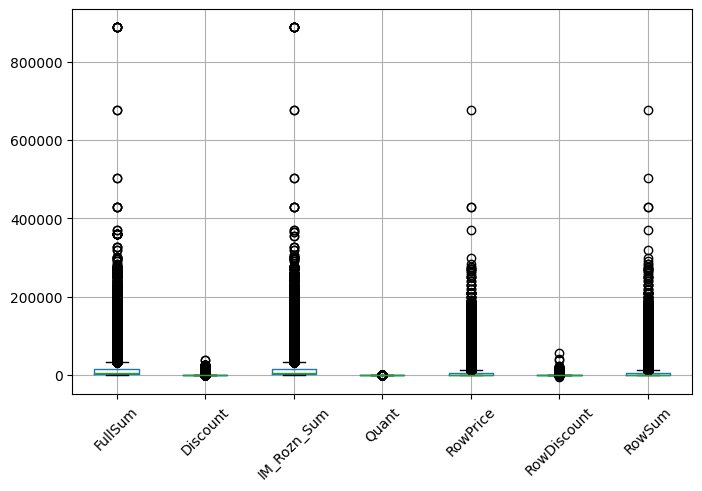

In [14]:
data[num_features].boxplot(figsize=(8, 5),
                           rot=45)

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=data[num_features].corr(),
            vmin=-1,
            vmax=1,
            annot=True);

- All numerical data is price-related.
- The most density in the distributions is situated close to zero.
- RowPrice and RowSum have nearly identical distributions and have 0.98 correlation.
- IM_Rozn_Sum and FullSum have nearly identical distributions and have 0.97 correlation.
- RowSum = RowPrice*Quant - RowDiscount, which is has great intutive explanatanion and decribes the correlation between these features, however not all values actually add up
- FullSum has no reason to exist as it either duplicates the value of IM_Rozn_Sum or adds the Discount to it, however does it randomly so no linear relationship can be established
- Discount and RowDiscount correlate with value 0.63. This is because RowDiscount is included in the Discount sum, and since RowDiscounts of other order positions have no relation to the order poition itsef, Discount feature is not needed and only introduces multicollinearity.
- IM_Rozn_Sum and RowSum have 0.56 correlation. This is because RowSum is included in the IM_Rozn_Sum, and like in the previous statement, IM_Rozn_Sum does not provide helpful information value, however we may tackle this issue in feature engineering.

## Preprocessing

In [16]:
# See how 'raw' the data is
df_info(data)

,columns,unique,NaN,zeros,d_type
0,Order_ID,166794,0,0,object
1,Email_new,99284,0,61516,object
2,Phone_new,123135,0,7575,object
3,Source,4,0,0,object
4,OrderDate,61,0,0,datetime64[ns]
5,время,58549,0,0,object
6,месяц,2,0,0,int64
7,ChangeDate,155189,0,0,object
8,DeliveryDate,100,0,0,object
9,PaymentDate,105118,0,0,object


- There are approximately 123135 unique clients across 166794 orders, therefore we likely could not have efficient client groups because not enough orders are placed from each ones, so it would be better to leave out personal info features like phone Order_ID, Email_new, Phone_new.
- There is a lot of irrelevant features, which are useful only for database running purposes. These features are: OrderDate время месяц ChangeDate DeliveryDate PaymentDate Row_ID Articul.
- There are some features which duplicate each other. One represent textual id, the other numerical. We are going to leave only textual, so we can encode them ourselves with best practise methods. These are: Status_ID Nom_ID
- There are 26888 unique goods(Nom_Name) which is a lot and also we already have a feature which has classified them into categories. So this feature would not be that helpful
- Cancel Reason, Actions, Brand, TN, TK have nearly half or more missing observations. These features have to be dropped, since it replicating them would is highly likely to misrepresent the actual distribution.
- Since there are not 12 more unqiue values in Region relatively to Area, we can leave only are. Most areas have no more than one region belonging to it

In [17]:
# features_to_drop = [
#        'Order_ID', 
#        'OrderDate', 'Email_new', 'время', 'месяц', 'ChangeDate', 'DeliveryDate', 'PaymentDate', 'Row_ID', 'Articul'
#        'Status_ID', 'Nom_ID', 
#        'Nom_Name',
#        'CancelReason', 'Actions', 'Brand', 'TN', 'TK',
#        'Region']

# final_features = [item for item in data.columns if item not in features_to_drop]
# final_features

In [18]:
# df_info(data[final_features])

Now, we have to deal with the missing values:
- there are 20 observations from which more than half the features have missiong values. These have to be removed.
- Delivery type has 2 unique values, therefore we can simulate the missing observations with appropriate binomial distribution
- Rest nan observation of Area will be removed vbecause 1631 is only a very small portion of our sample, and we can not appropriately replicate values.

In [19]:
#data.loc[data['Phone_new'] == 0, 'Phone_new'] = data['Email_new']
#df_info(data)

We can see that raplcing 0 values in the phone number with client's email doesn't change the situation with these 0 values, so we can drop the column email and use only phone numbers. (as there are less zero values)

In [20]:
# p = data['DeliveryType'].value_counts(normalize=True)[0]
# size = df_info(data[final_features]).loc[4, 'NaN']

# missing = data['DeliveryType'].isnull()
# data.loc[missing,'DeliveryType'] = np.random.binomial(1, p, size)

In [21]:
#data = data[final_features].dropna(subset=['FullSum'])

In [22]:
#data = data[final_features].dropna(subset=['Area'])

In [23]:
df_info(data)

,columns,unique,NaN,zeros,d_type
0,Order_ID,166794,0,0,object
1,Email_new,99284,0,61516,object
2,Phone_new,123135,0,7575,object
3,Source,4,0,0,object
4,OrderDate,61,0,0,datetime64[ns]
5,время,58549,0,0,object
6,месяц,2,0,0,int64
7,ChangeDate,155189,0,0,object
8,DeliveryDate,100,0,0,object
9,PaymentDate,105118,0,0,object


## Feature Engineering

As a result of previous investigation, we are going to perform the following operations:
1. Remove FullSum and Discount
2. Recount RowSum with the established formula
3. Derive OrderSumPct = RowSum/Im_Rozn_Sum - feature which calculates the percentage of the value the position has in the order 

Dropping out rows where: sum is equal to 0, discount is negative, cancel orders and orders who are responsable of "Услуги, доставка и тд"

In [24]:
data = df.copy(deep = True)

In [25]:
# data.drop(data[data['RowSum'] == 0].index, inplace=True)
# data.drop(data[data['RowDiscount'] < 0].index, inplace=True)
# data.drop(data[data['CancelReason'] != 0].index, inplace=True)

data = data.loc[data['RowSum']!= 0]
data = data.loc[data['RowDiscount'] >= 0]

In [26]:
data

,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,...,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID
1,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,3520.0,0.0,3520.0,NaN,NaN,NaN,Услуги/Страхование техники/Гарант +/,13.0,16686.0
2,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,35999.0,0.0,35999.0,Samsung,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/Smart теле...",13.0,95567.0
3,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,11:22:51.000,201603,2016-03-30 11:24:32.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,490.0,0.0,490.0,NaN,NaN,NaN,Услуги/Доставка/,13.0,29329.0
4,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,11:22:51.000,201603,2016-03-30 11:24:32.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,2.0,3990.0,0.0,7980.0,NaN,NaN,NaN,Установка и настройка техники/Установка и наст...,13.0,2748.0
5,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,11:22:51.000,201603,2016-03-30 11:24:32.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,2.0,4490.0,0.0,8980.0,NaN,NaN,NaN,Установка и настройка техники/Установка и наст...,13.0,7874.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357027,5898108_BX,566102117_fu20@rambler.ru,55574851-54534948525271,Онлайн-Резерв.,2016-04-30,23:57:42.000,201604,2016-05-09 09:10:30.000,2016-05-04 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,900.0,0.0,900.0,Hasbro,Детские товары,Игрушки,Детские товары/Игрушки/Творчество и развитие р...,17.0,123514.0
357029,75511561_BX,0,0,Терминал,2016-03-18,12:02:20.000,201603,2016-03-22 09:21:57.000,2016-03-25 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,17999.0,0.0,17999.0,Samsung,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/Smart теле...",11.0,41421.0
357031,75511562_BX,0,0,Терминал,2016-03-18,12:56:40.000,201603,2016-03-18 15:56:15.000,2016-03-18 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,1.0,0.0,1.0,Samsung,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/3D телевиз...",11.0,92697.0
357033,75511563_BX,0,0,Терминал,2016-03-15,16:43:15.000,201603,2016-03-20 09:20:45.000,2016-03-22 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,26990.0,0.0,26990.0,Philips,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/LED телеви...",11.0,111803.0


We do not need free stuff 

In [27]:
data['DiscountPercent'] = data['RowDiscount']/(data['RowSum'] + data['RowDiscount'])
data = data.loc[data['DiscountPercent']< 0.9]

We delete useless columns, or columns that carry similar information in terms of our analysis

In [28]:
data

,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,...,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID,DiscountPercent
1,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,3520.0,0.0,3520.0,NaN,NaN,NaN,Услуги/Страхование техники/Гарант +/,13.0,16686.0,0.0
2,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,35999.0,0.0,35999.0,Samsung,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/Smart теле...",13.0,95567.0,0.0
3,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,11:22:51.000,201603,2016-03-30 11:24:32.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,490.0,0.0,490.0,NaN,NaN,NaN,Услуги/Доставка/,13.0,29329.0,0.0
4,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,11:22:51.000,201603,2016-03-30 11:24:32.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,3990.0,0.0,7980.0,NaN,NaN,NaN,Установка и настройка техники/Установка и наст...,13.0,2748.0,0.0
5,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,11:22:51.000,201603,2016-03-30 11:24:32.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,4490.0,0.0,8980.0,NaN,NaN,NaN,Установка и настройка техники/Установка и наст...,13.0,7874.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357027,5898108_BX,566102117_fu20@rambler.ru,55574851-54534948525271,Онлайн-Резерв.,2016-04-30,23:57:42.000,201604,2016-05-09 09:10:30.000,2016-05-04 00:00:00.000,1900-01-01 00:00:00.000,...,900.0,0.0,900.0,Hasbro,Детские товары,Игрушки,Детские товары/Игрушки/Творчество и развитие р...,17.0,123514.0,0.0
357029,75511561_BX,0,0,Терминал,2016-03-18,12:02:20.000,201603,2016-03-22 09:21:57.000,2016-03-25 00:00:00.000,1900-01-01 00:00:00.000,...,17999.0,0.0,17999.0,Samsung,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/Smart теле...",11.0,41421.0,0.0
357031,75511562_BX,0,0,Терминал,2016-03-18,12:56:40.000,201603,2016-03-18 15:56:15.000,2016-03-18 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,0.0,1.0,Samsung,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/3D телевиз...",11.0,92697.0,0.0
357033,75511563_BX,0,0,Терминал,2016-03-15,16:43:15.000,201603,2016-03-20 09:20:45.000,2016-03-22 00:00:00.000,1900-01-01 00:00:00.000,...,26990.0,0.0,26990.0,Philips,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/LED телеви...",11.0,111803.0,0.0


In [29]:
data.Status.unique()

array(['Отменен', 'Выдан клиенту', 'Отказ на месте',
       'Доставлен в магазин', 'Доставлен частично в магазин',
       'Согласован', 'Собран', 'В обработке', 'Передан на доставку',
       'Дубль заказа', 'Подтвержден на доставку', 'Ожидает осмотра',
       'Размещен заказ у поставщика', 'Не собран', 'Собран частично'],
      dtype=object)

In [30]:
data = data.loc[~data['Status'].isin(['Дубль звказа'])]

Excluding services via TN column

In [31]:
data['nomfullpath_values'] = data.loc[data['TN'].isna(), 'NomFullPath']
print(data['nomfullpath_values'].unique())
# data.TN.unique()

['Услуги/Страхование техники/Гарант +/' nan 'Услуги/Доставка/'
 'Установка и настройка техники/Установка и настройка ТВ/'
 'Услуги/Страхование техники/Сервис +/'
 'Установка и настройка техники/Установка бытовой техники/Стиральные и посудомоечные машины/'
 'Установка и настройка техники/Установка бытовой техники/Электрические плиты и СВЧ/'
 'Номенклатура к привязке/'
 'Установка и настройка техники/Установка встраиваемой техники/Стиральные и посудомоечные машины/'
 'Установка и настройка техники/Установка встраиваемой техники/Электрические плиты и СВЧ/'
 'Установка и настройка техники/Установка бытовой техники/Холодильники/'
 'Установка и настройка техники/Установка и настройка программного обеспечения/'
 'Компьютеры, ноутбуки, планшеты/Устройства ввода/Клавиатуры/'
 'Компьютеры, ноутбуки, планшеты/Планшеты/Apple iPad/'
 'Установка и настройка техники/Установка бытовой техники/'
 'Установка и настройка техники/Тестирование ЖК-экранов/'
 'Номенклатура к обработке/'
 'Детские товары/Прог

In [32]:
# data.drop(data[data['NomFullPath'] == 'Услуги/Доставка/'].index, inplace=True)
# data.drop(data[data['NomFullPath'] == 'Услуги/Страхование техники/Гарант +/'].index, inplace=True)
# data.drop(data[data['NomFullPath'] == 'Установка и настройка техники/Установка и настройка ТВ/'].index, inplace=True)
data = data.loc[~data['nomfullpath_values'].isin(['Услуги/Доставка/', 'Услуги/Страхование техники/Гарант +/',
 'Установка и настройка техники/Установка и настройка ТВ/',
 'Услуги/Страхование техники/Сервис +/',
 'Установка и настройка техники/Установка бытовой техники/Стиральные и посудомоечные машины/',
 'Установка и настройка техники/Установка бытовой техники/Электрические плиты и СВЧ/',
 'Номенклатура к привязке/',
 'Установка и настройка техники/Установка встраиваемой техники/Стиральные и посудомоечные машины/',
 'Установка и настройка техники/Установка встраиваемой техники/Электрические плиты и СВЧ/',
 'Установка и настройка техники/Установка бытовой техники/Холодильники/',
 'Установка и настройка техники/Установка и настройка программного обеспечения/', 'Установка и настройка техники/Установка бытовой техники/', 'Установка и настройка техники/Тестирование ЖК-экранов/', 'Установка и настройка техники/Установка бытовой техники/Накопительные водонагреватели/', 'Услуги/Страхование техники/Защита МАКС/', 'Установка и настройка техники/Установка кондиционеров/', 
 'Установка и настройка техники/Установка встраиваемой техники/Холодильники/',  'Услуги/' ])]

# data = data.loc[~data['TN'].isin(['Услуги'])]

In [33]:
data = data.drop(columns=['nomfullpath_values', 'DiscountPercent', 'время', 'ChangeDate', 'DeliveryDate', 'Status_ID', 'Area', 'OneClick', 'Actions', 'NomFullPath', 'Store_ID', 'Discount', 'DeliveryType', 'IM_Rozn_Sum', 'Row_ID', 'Articul', 'Brand', 'Nom_ID', 'Week'])

In [34]:
df_info(data)

,columns,unique,NaN,zeros,d_type
0,Order_ID,166707,0,0,object
1,Email_new,99273,0,32762,object
2,Phone_new,123113,0,3867,object
3,Source,4,0,0,object
4,OrderDate,61,0,0,datetime64[ns]
5,месяц,2,0,0,int64
6,PaymentDate,105082,0,0,object
7,Status,15,0,0,object
8,CancelReason,34,122905,0,object
9,PaymentType,7,0,0,object


In [35]:
add_data = data.groupby(['Phone_new'])

In [36]:
add_data1 = data.groupby(['месяц'])


In [38]:
add_data1.mean(numeric_only=True).head()

,FullSum,Quant,RowPrice,RowDiscount,RowSum
месяц,,,,,
201603,12493.040865,1.068236,9674.255597,214.369225,9659.078470
201604,12707.228919,1.070938,9415.590783,76.746887,9554.247904


In [39]:
add_data.count().head()

,Order_ID,Email_new,Source,OrderDate,месяц,PaymentDate,Status,CancelReason,PaymentType,Region,FullSum,Nom_Name,NomGroup,Quant,RowPrice,RowDiscount,RowSum,TN,TK
Phone_new,,,,,,,,,,,,,,,,,,,
0,3867,3867,3867,3867,3867,3867,3867,1128,3867,3867,3867,3867,3867,3867,3867,3867,3867,3865,3865
32565748-000000000,15,15,15,15,15,15,15,7,15,15,15,15,15,15,15,15,15,15,15
32565748-535549565054 55,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
32565750-575448565151 а,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2
32565750-575448565151 а5,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1


In [41]:
add_data.sum(numeric_only=True).head()

,месяц,FullSum,Quant,RowPrice,RowDiscount,RowSum
Phone_new,,,,,,
0,779600852,21458691.02,3965.0,17935661.0,145451.0,18006197.0
32565748-000000000,3024053,259458.00,15.0,194173.0,1231.0,192942.0
32565748-535549565054 55,201603,12430.00,1.0,12430.0,0.0,12430.0
32565750-575448565151 а,403206,53198.00,2.0,26599.0,0.0,26599.0
32565750-575448565151 а5,201604,1590.00,1.0,1590.0,0.0,1590.0


In [43]:
add_data.mean(numeric_only=True).head()

,месяц,FullSum,Quant,RowPrice,RowDiscount,RowSum
Phone_new,,,,,,
0,201603.530385,5549.183093,1.025343,4638.133178,37.613395,4656.373675
32565748-000000000,201603.533333,17297.200000,1.000000,12944.866667,82.066667,12862.800000
32565748-535549565054 55,201603.000000,12430.000000,1.000000,12430.000000,0.000000,12430.000000
32565750-575448565151 а,201603.000000,26599.000000,1.000000,13299.500000,0.000000,13299.500000
32565750-575448565151 а5,201604.000000,1590.000000,1.000000,1590.000000,0.000000,1590.000000


In [44]:
data.Status.unique()

array(['Отменен', 'Выдан клиенту', 'Отказ на месте',
       'Доставлен в магазин', 'Доставлен частично в магазин',
       'Согласован', 'Собран', 'В обработке', 'Передан на доставку',
       'Дубль заказа', 'Подтвержден на доставку', 'Ожидает осмотра',
       'Размещен заказ у поставщика', 'Не собран', 'Собран частично'],
      dtype=object)

In [45]:
data = data.loc[data['Status'] == 'Выдан клиенту']

In [46]:
data.CancelReason.unique()

array([nan, 'Купил в магазине', 'Неполные данные в заказе',
       'Дублирование заказа техническое', 'Клиент не пришел за заказом',
       'Клиент передумал', 'Другое (указать в примечании)',
       'Не устроила дата доставки', 'Не поступила оплата',
       'Нет связи с клиентом', 'Несколько заказов', 'Ошибка в модели',
       'Клиент отказался назвать причину  отмены заказа',
       'Нет партнерского товара', 'Дублирование заказа',
       'Не устроили характеристики товара',
       'Витринный образец/Брак товара', 'Не устроила цена', 'Нет товара',
       'Не устроила дата доставки партнерского товара',
       'Нарушение сроков доставки',
       'Не устроила цена партнерского товара', 'Тестовый заказ',
       'Не устроили дата/время доставки',
       'Витрина/брак/некондиция/качество товара', 'Ошибка поставки',
       'Ошибка в информации о товаре'], dtype=object)

In [47]:
data = data[~data['CancelReason'].isin(['Купил в магазине', 'Неполные данные в заказе',
       'Дублирование заказа техническое', 'Клиент не пришел за заказом',
       'Клиент передумал', 'Другое (указать в примечании)',
       'Не устроила дата доставки', 'Не поступила оплата',
       'Нет связи с клиентом', 'Несколько заказов', 'Ошибка в модели',
       'Клиент отказался назвать причину  отмены заказа',
       'Нет партнерского товара', 'Дублирование заказа',
       'Не устроили характеристики товара',
       'Витринный образец/Брак товара', 'Не устроила цена', 'Нет товара',
       'Не устроила дата доставки партнерского товара',
       'Нарушение сроков доставки',
       'Не устроила цена партнерского товара', 'Тестовый заказ',
       'Не устроили дата/время доставки',
       'Витрина/брак/некондиция/качество товара', 'Ошибка поставки',
       'Ошибка в информации о товаре'])]

In [48]:
df_info(data)

,columns,unique,NaN,zeros,d_type
0,Order_ID,107140,0,0,object
1,Email_new,71546,0,19874,object
2,Phone_new,88889,0,2737,object
3,Source,4,0,0,object
4,OrderDate,61,0,0,datetime64[ns]
5,месяц,2,0,0,int64
6,PaymentDate,102956,0,0,object
7,Status,1,0,0,object
8,CancelReason,0,121720,0,object
9,PaymentType,7,0,0,object


In [49]:
pivot_count = pd.pivot_table(data, values='TN', index=pd.Grouper(key='месяц'), aggfunc='count')

pivot_sum = pd.pivot_table(data, values='RowSum', index=pd.Grouper(key='месяц'), aggfunc='sum')

pivot_unique_customers = pd.pivot_table(data, values='Phone_new', index=pd.Grouper(key='месяц'), aggfunc=pd.Series.nunique)

pivot_avg_price = pd.pivot_table(data, values='RowPrice', index=pd.Grouper(key='месяц'), aggfunc='mean')

result = pd.concat([pivot_count, pivot_sum, pivot_unique_customers, pivot_avg_price], axis=1)
result.columns = ['Number of Goods', 'Sum of Goods', 'Unique Customers', 'Average Price']

result

,Number of Goods,Sum of Goods,Unique Customers,Average Price
месяц,,,,
201603,62436,523635667.0,47438,8499.018497
201604,59267,486889604.0,43897,8165.183866


In [50]:
pivot_sum2 = pd.pivot_table(data, values='RowSum', index=pd.Grouper(key='TN'), aggfunc='sum')

pivot_unique_customers2 = pd.pivot_table(data, values='Phone_new', index=pd.Grouper(key='TN'), aggfunc=pd.Series.nunique)

pivot_avg_price2 = pd.pivot_table(data, values='RowPrice', index=pd.Grouper(key='TN'), aggfunc='mean')

result2 = pd.concat([pivot_sum2, pivot_unique_customers2, pivot_avg_price2], axis=1)
result2.columns = ['Sum of Goods', 'Unique Customers', 'Average Price']

result2

,Sum of Goods,Unique Customers,Average Price
TN,,,
Автотовары,83000.0,49,1660.020000
Аксессуары,19447869.0,8947,1556.393086
Детские товары,44508767.0,7047,5489.975003
"Игры, софт и развлечения",1363874.0,351,3076.229730
Климат,18254338.0,2143,7248.361634
Крупная бытовая техника,355372275.0,14683,18522.387307
Мебель,24378069.0,4967,3962.529461
Мелкая бытовая техника,129353722.0,21723,5006.155612
Сделай сам,66907866.0,9122,5593.284382


In [51]:
data

,Order_ID,Email_new,Phone_new,Source,OrderDate,месяц,PaymentDate,Status,CancelReason,PaymentType,Region,FullSum,Nom_Name,NomGroup,Quant,RowPrice,RowDiscount,RowSum,TN,TK
28,1303000520_TT,56666668112117_pu26@yanded.ru,55575449-54535553535073,Онлайн-Резерв.,2016-03-01,201603,2016-03-04 15:09:39.000,Выдан клиенту,NaN,КартойПриПолучении,Москва,2420.0,Картридж HP №950 CN049AE черный,Картриджи струйные,1.0,2420.0,0.0,2420.0,Аксессуары,Картриджи и бумага
30,1303000521_TT,551120117_xu11@bk.ru,55574954-53565052504871,Онлайн-Резерв.,2016-03-01,201603,2016-03-02 00:36:12.000,Выдан клиенту,NaN,Наличные,Санкт-Петербург,8999.0,Эл.плита Darina 1B ЕМ341 406 W,Электрические плиты,1.0,10999.0,2000.0,8999.0,Крупная бытовая техника,Плиты
34,1303000523_TT,5566664122117_zu16@hotbox.ru,55575049-51505248534972,Онлайн-Резерв.,2016-03-01,201603,2016-03-01 20:28:42.000,Выдан клиенту,NaN,Наличные,Москва,1790.0,Радиочасы Oregon Scientific RM338P-b,Термометры и метеостанции,1.0,1790.0,0.0,1790.0,Цифровая Техника,Портативная электроника
36,1303000524_TT,0,55574954-53495654564877,Колл-центр,2016-03-01,201603,2016-03-02 11:59:15.000,Выдан клиенту,NaN,Наличные,Псков,1420.0,Триммер Remington NE3450,Триммеры для бороды и усов,1.0,1420.0,0.0,1420.0,Мелкая бытовая техника,Красота и здоровье
38,1303000525_TT,5563110117_nu16@list.ru,55575054-53544849485671,Онлайн-Резерв.,2016-03-01,201603,2016-03-01 17:29:05.000,Выдан клиенту,NaN,Наличные,Смоленск,249.0,Струны ELO нейлон,Аксессуары для гитар и синтезаторов,1.0,249.0,0.0,249.0,ТВ-Аудио,Музыкальные инструменты
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357010,5898073_ES,66497117_au14@inbox.ru,55575055-51565055494871,Онлайн-Резерв.,2016-04-30,201604,2016-05-02 10:29:51.000,Выдан клиенту,NaN,Наличные,Мурманск,21380.0,Телевизор LED LG 32LF560V,LED телевизоры,1.0,19990.0,0.0,19990.0,ТВ-Аудио,Телевизоры LCD
357015,5898087_BX,3109117_mu20@workmail.ru,55575053-55485548545470,Онлайн-Резерв.,2016-04-30,201604,2016-05-07 18:04:13.000,Выдан клиенту,NaN,КартойПриПолучении,Казань,13049.0,Смартфон ASUS ZE500KL-1B120RU,Смартфоны,1.0,11870.0,500.0,11370.0,Цифровая Техника,Мобильные средства связи
357019,5898089_BX,6666449117_1u9@bk.ru,55574957-51495048515075,Онлайн-Резерв.,2016-04-30,201604,2016-05-02 00:10:22.000,Выдан клиенту,NaN,Наличные,Москва,1149.0,Вент/напол Saturn ST-FN8268,Вентиляторы,1.0,899.0,0.0,899.0,Климат,Вентиляторы бытовые
357021,5898095_BX,666661118109_vm27@yahoo.com,55575452-55554849505278,Онлайн-Резерв.,2016-04-30,201604,2016-05-04 19:43:41.000,Выдан клиенту,NaN,Наличные,Серпухов,1090.0,Сумка Case Logic DCB304K черн.,Сумки для зеркальных фотоаппаратов,1.0,1090.0,0.0,1090.0,Аксессуары,Аксессуары для фото/видео


In [52]:
number_bills = data.groupby(by=['Phone_new', 'Order_ID']).count().groupby(by='Phone_new').count()[['Email_new']]
number_bills

,Email_new
Phone_new,
0,2535
32565748-000000000,8
32565750-575448565151 а,1
32565750-575448565151 а5,1
43553240-575054413251+75,2
...,...
57495456-56485151574991,1
57505548-48535350504991,1
57555656-55575253555698,1


In [54]:
avg_bill = data.groupby(by=['Phone_new', 'Order_ID']).sum(numeric_only=True)[['RowSum']].reset_index().groupby(by='Phone_new').mean(numeric_only=True)['RowSum']
avg_bill

Phone_new
0                            3005.395266
32565748-000000000           2469.625000
32565750-575448565151 а     26599.000000
32565750-575448565151 а5     1590.000000
43553240-575054413251+75     5064.500000
                                ...     
57495456-56485151574991      1609.000000
57505548-48535350504991       999.000000
57555656-55575253555698      3850.000000
57565352-52575050555092      1999.000000
57565355-57554952485597      3080.000000
Name: RowSum, Length: 88889, dtype: float64

In [55]:
avg_number_goods_bill = data.groupby(by = ['Phone_new', 'Order_ID']).count().groupby(by='Phone_new').mean(numeric_only=True)['Email_new']
avg_number_goods_bill

Phone_new
0                           1.079684
32565748-000000000          1.000000
32565750-575448565151 а     2.000000
32565750-575448565151 а5    1.000000
43553240-575054413251+75    1.000000
                              ...   
57495456-56485151574991     1.000000
57505548-48535350504991     1.000000
57555656-55575253555698     1.000000
57565352-52575050555092     1.000000
57565355-57554952485597     1.000000
Name: Email_new, Length: 88889, dtype: float64

In [56]:
revenue = data.groupby(by = ['Phone_new']).sum(numeric_only=True)[['RowSum', 'Quant', 'RowDiscount']]
revenue

,RowSum,Quant,RowDiscount
Phone_new,,,
0,7618677.0,2804.0,112188.0
32565748-000000000,19757.0,8.0,0.0
32565750-575448565151 а,26599.0,2.0,0.0
32565750-575448565151 а5,1590.0,1.0,0.0
43553240-575054413251+75,10129.0,2.0,0.0
...,...,...,...
57495456-56485151574991,1609.0,1.0,0.0
57505548-48535350504991,999.0,1.0,0.0
57555656-55575253555698,3850.0,1.0,0.0


In [57]:
number_goods = data.groupby(by=['Phone_new', 'Order_ID']).count().groupby(by='Phone_new').sum(numeric_only=True)[['Email_new']]
number_goods

,Email_new
Phone_new,
0,2737
32565748-000000000,8
32565750-575448565151 а,2
32565750-575448565151 а5,1
43553240-575054413251+75,2
...,...
57495456-56485151574991,1
57505548-48535350504991,1
57555656-55575253555698,1


In [58]:
(number_goods.Email_new == number_bills.Email_new).value_counts()

Email_new
True     79657
False     9232
Name: count, dtype: int64

In [59]:
pd.get_dummies(data, columns=['TN'])

,Order_ID,Email_new,Phone_new,Source,OrderDate,месяц,PaymentDate,Status,CancelReason,PaymentType,...,TN_Мебель,TN_Мелкая бытовая техника,TN_Сделай сам,TN_Спорт и активный отдых,TN_ТВ-Аудио,TN_Товары для дома,TN_Услуги,"TN_Хобби, досуг",TN_Цифровая Техника,TN_Элитная техника
28,1303000520_TT,56666668112117_pu26@yanded.ru,55575449-54535553535073,Онлайн-Резерв.,2016-03-01,201603,2016-03-04 15:09:39.000,Выдан клиенту,NaN,КартойПриПолучении,...,False,False,False,False,False,False,False,False,False,False
30,1303000521_TT,551120117_xu11@bk.ru,55574954-53565052504871,Онлайн-Резерв.,2016-03-01,201603,2016-03-02 00:36:12.000,Выдан клиенту,NaN,Наличные,...,False,False,False,False,False,False,False,False,False,False
34,1303000523_TT,5566664122117_zu16@hotbox.ru,55575049-51505248534972,Онлайн-Резерв.,2016-03-01,201603,2016-03-01 20:28:42.000,Выдан клиенту,NaN,Наличные,...,False,False,False,False,False,False,False,False,True,False
36,1303000524_TT,0,55574954-53495654564877,Колл-центр,2016-03-01,201603,2016-03-02 11:59:15.000,Выдан клиенту,NaN,Наличные,...,False,True,False,False,False,False,False,False,False,False
38,1303000525_TT,5563110117_nu16@list.ru,55575054-53544849485671,Онлайн-Резерв.,2016-03-01,201603,2016-03-01 17:29:05.000,Выдан клиенту,NaN,Наличные,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357010,5898073_ES,66497117_au14@inbox.ru,55575055-51565055494871,Онлайн-Резерв.,2016-04-30,201604,2016-05-02 10:29:51.000,Выдан клиенту,NaN,Наличные,...,False,False,False,False,True,False,False,False,False,False
357015,5898087_BX,3109117_mu20@workmail.ru,55575053-55485548545470,Онлайн-Резерв.,2016-04-30,201604,2016-05-07 18:04:13.000,Выдан клиенту,NaN,КартойПриПолучении,...,False,False,False,False,False,False,False,False,True,False
357019,5898089_BX,6666449117_1u9@bk.ru,55574957-51495048515075,Онлайн-Резерв.,2016-04-30,201604,2016-05-02 00:10:22.000,Выдан клиенту,NaN,Наличные,...,False,False,False,False,False,False,False,False,False,False
357021,5898095_BX,666661118109_vm27@yahoo.com,55575452-55554849505278,Онлайн-Резерв.,2016-04-30,201604,2016-05-04 19:43:41.000,Выдан клиенту,NaN,Наличные,...,False,False,False,False,False,False,False,False,False,False


In [62]:
tns = data['TN'].unique()
dummy_data = pd.get_dummies(data, columns=['TN']) 

encoded =['TN_Автотовары', 'TN_Аксессуары', 'TN_Детские товары',
       'TN_Игры, софт и развлечения', 'TN_Климат',
       'TN_Крупная бытовая техника', 'TN_Мебель', 'TN_Мелкая бытовая техника',
       'TN_Сделай сам', 'TN_Спорт и активный отдых', 'TN_ТВ-Аудио',
       'TN_Товары для дома', 'TN_Услуги', 'TN_Хобби, досуг',
       'TN_Цифровая Техника', 'TN_Элитная техника']

tns_data = dummy_data.groupby(by=['Phone_new']).sum(numeric_only=True)[encoded]

In [63]:
# data_display = pd.DataFrame()

data_display = pd.concat([number_bills, avg_bill, avg_number_goods_bill, revenue, number_goods, tns_data], axis=1)
data_display.columns = ['Number of bills', 'Average bill', 'Average number of goods in bill', 'Revenue', 'Total quantity', 'Discount', 'Number of goods']+encoded
data_display

,Number of bills,Average bill,Average number of goods in bill,Revenue,Total quantity,Discount,Number of goods,TN_Автотовары,TN_Аксессуары,TN_Детские товары,...,TN_Мебель,TN_Мелкая бытовая техника,TN_Сделай сам,TN_Спорт и активный отдых,TN_ТВ-Аудио,TN_Товары для дома,TN_Услуги,"TN_Хобби, досуг",TN_Цифровая Техника,TN_Элитная техника
Phone_new,,,,,,,,,,,,,,,,,,,,,
0,2535,3005.395266,1.079684,7618677.0,2804.0,112188.0,2737,0,1251,34,...,20,509,64,13,143,250,0,0,286,0
32565748-000000000,8,2469.625000,1.000000,19757.0,8.0,0.0,8,0,3,1,...,0,1,0,0,2,0,0,0,0,0
32565750-575448565151 а,1,26599.000000,2.000000,26599.0,2.0,0.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32565750-575448565151 а5,1,1590.000000,1.000000,1590.0,1.0,0.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
43553240-575054413251+75,2,5064.500000,1.000000,10129.0,2.0,0.0,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57495456-56485151574991,1,1609.000000,1.000000,1609.0,1.0,0.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
57505548-48535350504991,1,999.000000,1.000000,999.0,1.0,0.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
57555656-55575253555698,1,3850.000000,1.000000,3850.0,1.0,0.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [64]:
for tn in encoded:
    data_display['%'+tn] = data_display[tn]/data_display['Number of goods'] * 100

data_display

,Number of bills,Average bill,Average number of goods in bill,Revenue,Total quantity,Discount,Number of goods,TN_Автотовары,TN_Аксессуары,TN_Детские товары,...,%TN_Мебель,%TN_Мелкая бытовая техника,%TN_Сделай сам,%TN_Спорт и активный отдых,%TN_ТВ-Аудио,%TN_Товары для дома,%TN_Услуги,"%TN_Хобби, досуг",%TN_Цифровая Техника,%TN_Элитная техника
Phone_new,,,,,,,,,,,,,,,,,,,,,
0,2535,3005.395266,1.079684,7618677.0,2804.0,112188.0,2737,0,1251,34,...,0.730727,18.597004,2.338327,0.474973,5.224699,9.134088,0.0,0.0,10.449397,0.0
32565748-000000000,8,2469.625000,1.000000,19757.0,8.0,0.0,8,0,3,1,...,0.000000,12.500000,0.000000,0.000000,25.000000,0.000000,0.0,0.0,0.000000,0.0
32565750-575448565151 а,1,26599.000000,2.000000,26599.0,2.0,0.0,2,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
32565750-575448565151 а5,1,1590.000000,1.000000,1590.0,1.0,0.0,1,0,0,0,...,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
43553240-575054413251+75,2,5064.500000,1.000000,10129.0,2.0,0.0,2,0,0,0,...,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57495456-56485151574991,1,1609.000000,1.000000,1609.0,1.0,0.0,1,0,0,0,...,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
57505548-48535350504991,1,999.000000,1.000000,999.0,1.0,0.0,1,0,0,0,...,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
57555656-55575253555698,1,3850.000000,1.000000,3850.0,1.0,0.0,1,0,0,0,...,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [65]:
data_display.iloc[1:,:]

,Number of bills,Average bill,Average number of goods in bill,Revenue,Total quantity,Discount,Number of goods,TN_Автотовары,TN_Аксессуары,TN_Детские товары,...,%TN_Мебель,%TN_Мелкая бытовая техника,%TN_Сделай сам,%TN_Спорт и активный отдых,%TN_ТВ-Аудио,%TN_Товары для дома,%TN_Услуги,"%TN_Хобби, досуг",%TN_Цифровая Техника,%TN_Элитная техника
Phone_new,,,,,,,,,,,,,,,,,,,,,
32565748-000000000,8,2469.625,1.0,19757.0,8.0,0.0,8,0,3,1,...,0.0,12.5,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0
32565750-575448565151 а,1,26599.000,2.0,26599.0,2.0,0.0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32565750-575448565151 а5,1,1590.000,1.0,1590.0,1.0,0.0,1,0,0,0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43553240-575054413251+75,2,5064.500,1.0,10129.0,2.0,0.0,2,0,0,0,...,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55445748-514957495657715,1,27449.000,1.0,27449.0,1.0,0.0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57495456-56485151574991,1,1609.000,1.0,1609.0,1.0,0.0,1,0,0,0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57505548-48535350504991,1,999.000,1.0,999.0,1.0,0.0,1,0,0,0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57555656-55575253555698,1,3850.000,1.0,3850.0,1.0,0.0,1,0,0,0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
data1 = data.sort_values(by = ['OrderDate'], ascending = False)
data_display['OrderDate'] = data1.groupby(by = ['Phone_new']).first()['OrderDate']

In [67]:
data_display = data_display.iloc[1:,:]

In [68]:
data_display

,Number of bills,Average bill,Average number of goods in bill,Revenue,Total quantity,Discount,Number of goods,TN_Автотовары,TN_Аксессуары,TN_Детские товары,...,%TN_Мелкая бытовая техника,%TN_Сделай сам,%TN_Спорт и активный отдых,%TN_ТВ-Аудио,%TN_Товары для дома,%TN_Услуги,"%TN_Хобби, досуг",%TN_Цифровая Техника,%TN_Элитная техника,OrderDate
Phone_new,,,,,,,,,,,,,,,,,,,,,
32565748-000000000,8,2469.625,1.0,19757.0,8.0,0.0,8,0,3,1,...,12.5,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,2016-04-26
32565750-575448565151 а,1,26599.000,2.0,26599.0,2.0,0.0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-03-31
32565750-575448565151 а5,1,1590.000,1.0,1590.0,1.0,0.0,1,0,0,0,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-04-12
43553240-575054413251+75,2,5064.500,1.0,10129.0,2.0,0.0,2,0,0,0,...,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-04-09
55445748-514957495657715,1,27449.000,1.0,27449.0,1.0,0.0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-04-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57495456-56485151574991,1,1609.000,1.0,1609.0,1.0,0.0,1,0,0,0,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-03-14
57505548-48535350504991,1,999.000,1.0,999.0,1.0,0.0,1,0,0,0,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-03-06
57555656-55575253555698,1,3850.000,1.0,3850.0,1.0,0.0,1,0,0,0,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-04-19


In [70]:
data_display.to_excel(Path.cwd()/'vitrina.xlsx')
